In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('Height-Weight.csv')

In [4]:
df.head()

,Weight,Height
0,83,151.904082
1,96,165.629617
2,73,130.050214
3,59,124.407512
4,87,150.182900


Text(0, 0.5, 'height')

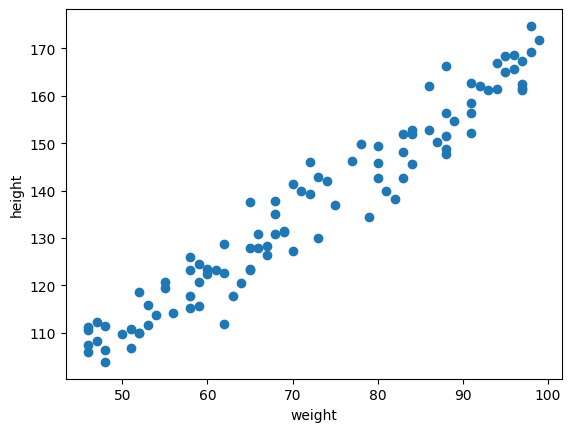

In [5]:
# Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

In [6]:
#Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.970713
Height,0.970713,1.000000


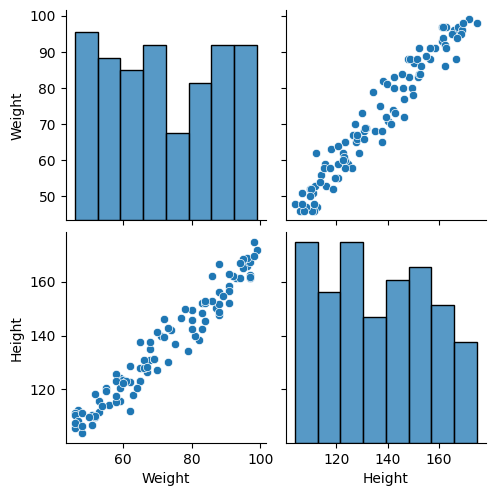

In [7]:
#Seaborn for visualisation
import seaborn as sns
sns.pairplot(df)

In [8]:
#independent and dependent feature into 2D
X = df[['Weight']]
X.head()
y = df['Height']## this can be series or 1D

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
#Train test split
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [12]:
X_train.shape
X_train

,Weight
15,84
40,88
96,89
9,67
72,48
...,...
60,72
71,84
14,80
92,67


In [13]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_test

array([[ 0.41224809],
       [-0.82202763],
       [ 1.39966866],
       [ 1.46138245],
       [ 0.59738945],
       [ 1.46138245],
       [ 1.02938595],
       [-0.57517248],
       [-1.00716899],
       [ 0.72081702],
       [-0.32831734],
       [ 1.02938595],
       [-1.56259306],
       [-0.01974841],
       [-1.19231034],
       [ 0.96767216],
       [ 0.90595838],
       [-1.43916549],
       [-0.20488977],
       [-0.14317598],
       [-1.13059656],
       [ 1.27624109],
       [-0.39003113],
       [ 1.52309624],
       [ 0.53567566]])

In [17]:
#apply simple linear regression
from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression()

In [19]:
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
print("intercept", regression.intercept_) ## this is the intercept value which means beta 0  of the slope y=mx+c
print("coefficient", regression.coef_ )## this is the coef, which means beta 1


#19.00 states that for every unit moment in weight, there is a 19.00 if height moment on avg

intercept 135.52765882895585
coefficient [19.00932428]


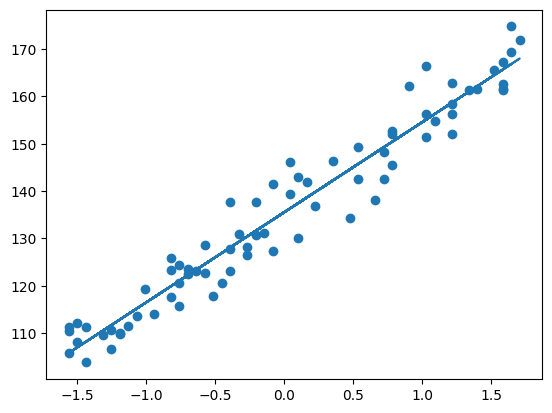

In [21]:
#plotting best fit for train data
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

##Prediction of test data

predicted height output = intercept + coef_(Weights)
y_pred_test = 135.527 + 19.00(X_test)

In [22]:
#prediction for test
y_pred = regression.predict(X_test)

In [23]:
##performance matrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

23.432961377296355
4.012495210242385
4.840760413126883


In [24]:
## R square
from sklearn.metrics import r2_score


In [25]:
score = r2_score(y_test, y_pred)
print(score)


0.9392303238390871


In [26]:
## prediction for new data

regression.predict(scaler.fit_transform([[72]]))

array([135.52765883])

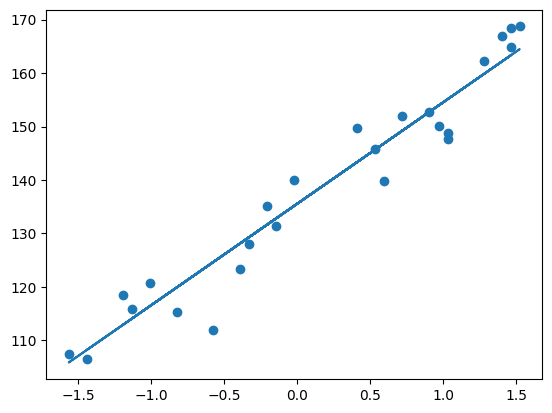

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regression.predict(X_test))

In [ ]:
3244
45
137